# 0.导入相关库

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1.探索数据

### 1.1 导入数据，观察基本样貌

In [2]:
df = pd.read_csv('./data/HFT_XY_unselected.csv') #从网盘中下载
col_names_x = df.columns[1:333]
x_all = np.asarray(df[col_names_x])
col_names_y = df.columns[333]
y_all = np.asarray(df[col_names_y])
print col_names_x
print col_names_y
print x_all.shape
print y_all.shape

# train test split
# Don't shuffle!!
train_x = x_all[0:x_all.shape[0]*7/10]
train_y = y_all[0:y_all.shape[0]*7/10]
test_x = x_all[x_all.shape[0]*7/10:]
test_y = y_all[y_all.shape[0]*7/10:]
print train_y.shape
print train_x.shape
print test_x.shape
print test_y.shape

Index([u'X1', u'X2', u'X3', u'X4', u'X5', u'X6', u'X7', u'X8', u'X9', u'X10',
       ...
       u'X323', u'X324', u'X325', u'X326', u'X327', u'X328', u'X329', u'X330',
       u'X331', u'X332'],
      dtype='object', length=332)
realY
(241032, 332)
(241032,)
(168722,)
(168722, 332)
(72310, 332)
(72310,)


In [5]:
df.head(20)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X325,X326,X327,X328,X329,X330,X331,X332,realY,predictY
0,0,-0.0,-0.000000,-0.000000,-0.000000,-0.000000,-0.0,-0.000000,-0.0,4.506952,...,4.139076,3.443876,6.085272,4.589867,-2.979077,-6.393372,-4.417067,-4.611922,-0.000000,0.0
1,1,-0.0,-0.000000,-0.000000,0.551516,1.103168,-0.0,-0.949546,-0.0,-0.000000,...,4.151743,4.566135,6.904618,3.911805,-4.863125,-9.709144,-3.535746,-3.946805,1.199756,0.0
2,2,-0.0,-0.000000,-0.000000,0.874133,0.753029,-0.0,-0.000000,-0.0,-0.000000,...,4.139076,4.062686,8.037572,4.589867,-3.737310,-7.461474,-4.846605,-5.060409,-0.516707,0.0
3,3,-0.0,-0.000000,-0.000000,-0.874133,0.475108,-0.0,-0.000000,-0.0,-0.000000,...,4.139076,4.031714,7.738847,4.589867,-3.202318,-8.799307,-3.505467,-4.390713,-0.000000,0.0
4,4,-0.0,-0.000000,-0.000000,-0.874133,1.333798,-0.0,-0.000000,-0.0,-0.000000,...,4.151743,3.638764,6.904618,3.911805,-4.063161,-9.709144,-4.418497,-4.613416,1.033414,0.0
5,5,-0.0,-0.000000,-0.000000,-1.280581,-1.941988,-0.0,-0.949546,-0.0,-0.000000,...,4.301143,4.047340,7.237616,4.902317,-4.813826,-9.610719,-4.485265,-4.683129,-0.000000,0.0
6,6,-0.0,-0.000000,-0.000000,-0.000000,-1.103168,-0.0,-0.000000,-0.0,-0.000000,...,4.481227,3.600562,6.872588,4.530746,-3.509450,-9.226724,-2.675885,-3.334291,-0.000000,0.0
7,7,-0.0,-0.000000,-1.713583,-1.548302,-0.000000,-0.0,-0.000000,-0.0,2.968968,...,4.019670,3.326885,7.781380,4.589867,-4.407405,-9.532659,-3.388022,-4.166880,0.516707,0.0
8,8,-0.0,-0.000000,1.713583,0.874133,1.643605,-0.0,-0.000000,-0.0,-0.000000,...,4.120347,4.535977,6.846383,3.766036,-4.711169,-9.405768,-4.205203,-4.613416,-0.818961,0.0
9,9,-0.0,-0.000000,1.713583,1.280581,-1.103168,-0.0,-0.000000,-0.0,2.133396,...,4.151743,3.949016,7.059504,3.911805,-3.855354,-10.327431,-3.489830,-3.920738,0.516707,0.0


### 结论：似乎前几个feature分布有问题，数据没有归一化，predictY没有用

### 1.2 查看整体统计量以及分布情况

In [6]:
df.describe()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X325,X326,X327,X328,X329,X330,X331,X332,realY,predictY
count,241032.000000,241032.000000,241032.000000,241032.000000,241032.000000,241032.000000,241032.000000,241032.000000,241032.000000,241032.000000,...,241032.000000,241032.000000,241032.000000,241032.000000,241032.000000,241032.000000,241032.000000,241032.000000,241032.000000,241032.0
mean,120515.500000,0.000083,0.000363,0.001279,0.001157,-0.001078,0.000080,0.000716,-0.000109,0.530091,...,4.160785,3.635319,7.016984,4.250542,-3.556655,-8.322882,-3.206445,-3.928174,0.001645,0.0
std,69580.089379,0.143406,0.253748,0.846760,0.695564,0.890020,0.039000,0.352741,0.045204,1.204399,...,0.411218,1.178969,1.193248,0.408843,1.001286,1.532479,0.913621,0.731242,0.495579,0.0
min,0.000000,-1.637922,-1.820020,-6.604234,-3.368951,-3.012116,-2.064929,-2.072535,-1.080625,-9.401077,...,1.863253,-3.922571,0.899100,2.090466,-7.882674,-15.737621,-6.502238,-6.789080,-2.154629,0.0
25%,60257.750000,-0.000000,-0.000000,-0.000000,-0.551516,-0.753029,-0.000000,-0.000000,-0.000000,-0.000000,...,3.893059,2.832421,6.242012,3.990114,-4.279216,-9.458552,-3.871978,-4.474393,-0.516707,0.0
50%,120515.500000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,4.183069,3.755075,7.114476,4.273979,-3.655428,-8.447959,-3.290411,-3.989467,-0.000000,0.0
75%,180773.250000,-0.000000,-0.000000,-0.000000,0.551516,0.753029,-0.000000,-0.000000,-0.000000,-0.000000,...,4.453331,4.531581,7.930219,4.537263,-2.921795,-7.329006,-2.624433,-3.457098,0.516707,0.0
max,241031.000000,1.787512,1.921560,5.714315,3.096605,2.639032,1.409534,2.072535,1.080625,9.262253,...,6.694471,8.007467,12.086079,6.397746,1.098021,-1.096090,1.145026,-0.000000,3.530601,0.0


### 结论：前面一些feature在25和50以及75的地方都是0，应该是这些feature分布有问题，其他数据直观来看没什么亮点

### 1.3 观察realY

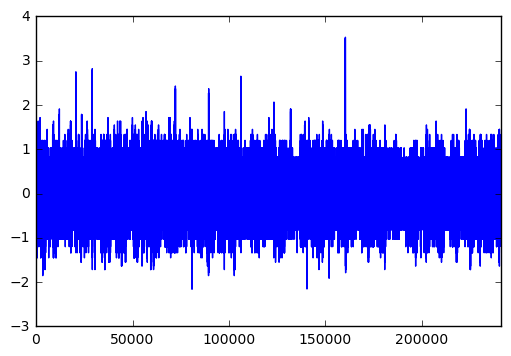

In [6]:
plt.figure()
df[col_names_y].plot()
plt.show()

#### realY在-1到1之间波动，有很少的异常值

#### histogram

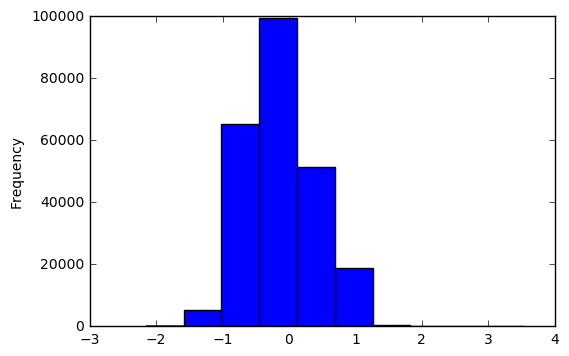

In [5]:
plt.figure()
df[col_names_y].plot.hist()
plt.show()

Box plot

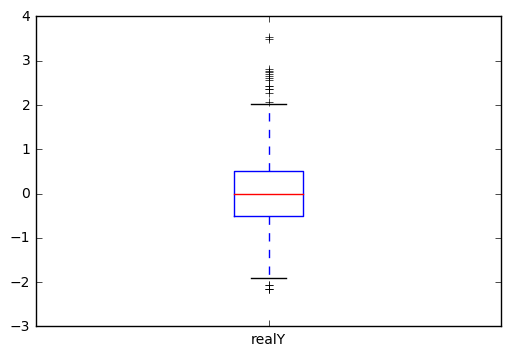

In [23]:
plt.figure()
df[col_names_y].plot.box()
plt.show()

由于特征众多，所以只能随机挑选一些出来绘制比较的图表

<font color=#DC143C size=4 > Todo：现在为手动操作，实现随机功能 </font>

scatter matrix

In [24]:
df_part = df.loc[:,['X33','X99','X124','realY']]

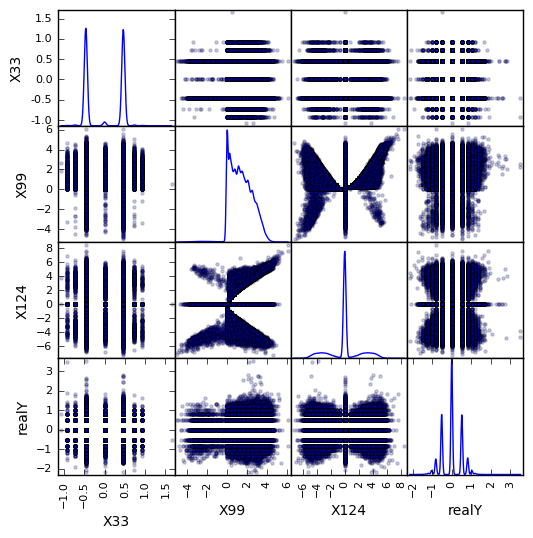

In [27]:
fig = plt.figure()
pd.scatter_matrix(df_part, alpha=0.2, figsize=(6, 6), diagonal='kde')
plt.show()

不同特征分布差异很大

<font color=#DC143C size=4 > Todo：这个scatter matrix 说明了什么？ </font>

首先用OLS（线性模型）作为benchmark，查看r2值

In [19]:
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error

ols = linear_model.LinearRegression()
pred_ols = ols.fit(train_x,train_y).predict(test_x)
print("Accuracy: %.2f (for OLS)" % (r2_score(test_y,pred_ols) * 100.0))

Accuracy: 6.48 (for OLS)


尝试一些其他模型

SVR

In [ ]:
from sklearn import svm
svr = svm.SVR()
pred_svr = svr.fit(train_x,train_y).predict(test_x)
print("Accuracy: %.2f (for OLS)" % (r2_score(test_y,pred_svr) * 100.0))